# Final Analysis


Aggregate results.

Plots: accuracy vs shots, accuracy vs depth, runtime vs qubits.

Compare to classical baseline.

Write short interpretation.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [18]:
sns.set(style="whitegrid", context="talk", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)

c_lr_path = "../results/metrics/lr_results.csv"
c_svm_path = "../results/metrics/svm_results.csv"
q_lr_path = "../results/metrics/q_lr_sweep_results.csv"
q_svm_path = "../results/metrics/q_svm_sweep_results.csv"

c_lr_df = pd.read_csv(c_lr_path)
c_svm_df = pd.read_csv(c_svm_path)
q_lr_df = pd.read_csv(q_lr_path)
q_svm_df = pd.read_csv(q_svm_path)


display(c_lr_df.head())
display(c_svm_df.head()) 
display(q_lr_df.head())
display(q_svm_df.head()) 

,n_qubits,depth,shots,noise,accuracy,runtime_sec
0,0,0,NaN,False,0.996217,0.008


,n_qubits,depth,shots,noise,accuracy,runtime_sec
0,0,0,NaN,False,0.996217,0.06


,n_qubits,depth,shots,noise,accuracy,runtime_sec
0,2,1,analytic,False,0.813712,0.048242
1,2,1,1024,False,0.808511,0.025341
2,2,2,analytic,False,0.809456,0.051257
3,2,2,1024,False,0.808038,0.028615
4,3,1,analytic,False,0.915366,0.041991


,n_qubits,depth,shots,noise,accuracy,runtime_sec
0,2,1,analytic,False,0.808983,5.480880
1,2,1,1024,False,0.805201,5.223764
2,2,2,analytic,False,0.813239,5.733612
3,2,2,1024,False,0.805201,3.006099
4,3,1,analytic,False,0.917258,1.632859


In [19]:
print(q_lr_df.dtypes)
print("\n", q_svm_df.dtypes)

for df in [q_lr_df, q_svm_df]:
    df["shots"] = df["shots"].replace("analytic", 0).astype(str)



n_qubits         int64
depth            int64
shots           object
noise             bool
accuracy       float64
runtime_sec    float64
dtype: object

 n_qubits         int64
depth            int64
shots           object
noise             bool
accuracy       float64
runtime_sec    float64
dtype: object


### Aggregate Quantum Results

In [20]:
q_lr_agg = q_lr_df.groupby(["n_qubits", "depth", "shots", "noise"]).agg({
    "accuracy":["mean"], 
    "runtime_sec": "mean"}).reset_index()

q_svm_agg = q_svm_df.groupby(["n_qubits", "depth", "shots", "noise"]).agg({
    "accuracy":["mean"], 
    "runtime_sec": "mean"}).reset_index()

q_lr_agg.columns = ["n_qubits", "depth", "shots", "noise", "acc_mean", "runtime_sec"]
q_svm_agg.columns = ["n_qubits", "depth", "shots", "noise", "acc_mean", "runtime_sec"]

display(q_lr_agg)
display(q_svm_agg)

,n_qubits,depth,shots,noise,acc_mean,runtime_sec
0,2,1,0,False,0.813712,0.048242
1,2,1,1024,False,0.808511,0.025341
2,2,2,0,False,0.809456,0.051257
3,2,2,1024,False,0.808038,0.028615
4,3,1,0,False,0.915366,0.041991
5,3,1,1024,False,0.915839,0.030111
6,3,2,0,False,0.861466,0.044576
7,3,2,1024,False,0.862884,0.052727
8,4,1,0,False,0.852482,0.056384
9,4,1,1024,False,0.852009,0.048403


,n_qubits,depth,shots,noise,acc_mean,runtime_sec
0,2,1,0,False,0.808983,5.480880
1,2,1,1024,False,0.805201,5.223764
2,2,2,0,False,0.813239,5.733612
3,2,2,1024,False,0.805201,3.006099
4,3,1,0,False,0.917258,1.632859
5,3,1,1024,False,0.914421,1.078494
6,3,2,0,False,0.869976,2.339074
7,3,2,1024,False,0.867612,2.938713
8,4,1,0,False,0.856738,3.113779
9,4,1,1024,False,0.861466,4.104477


### Classical v Quantum Comparison

In [21]:
c_lr_acc = c_lr_df["accuracy"].mean()
c_svm_acc = c_svm_df["accuracy"].mean()

c_lr_std = c_lr_df["accuracy"].std()
c_svm_std = c_svm_df["accuracy"].std()

print(f"Classical Log reg accuracy (avg): {c_lr_acc:.3f} ± {c_lr_std:.3f}")
print(f"Classical SVM accuracy (avg): {c_svm_acc:.3f} ± {c_svm_std:.3f}")

q_lr_agg["improvement_over_classical"] = q_lr_agg["acc_mean"] - c_lr_acc
q_svm_agg["improvement_over_classical"] = q_svm_agg["acc_mean"] - c_svm_acc


Classical Log reg accuracy (avg): 0.996 ± nan
Classical SVM accuracy (avg): 0.996 ± nan


### Visualizations

#### Logistic Regression

**Accuracy vs Circuit Depth**

The best performing Logistic Regression had an average of 

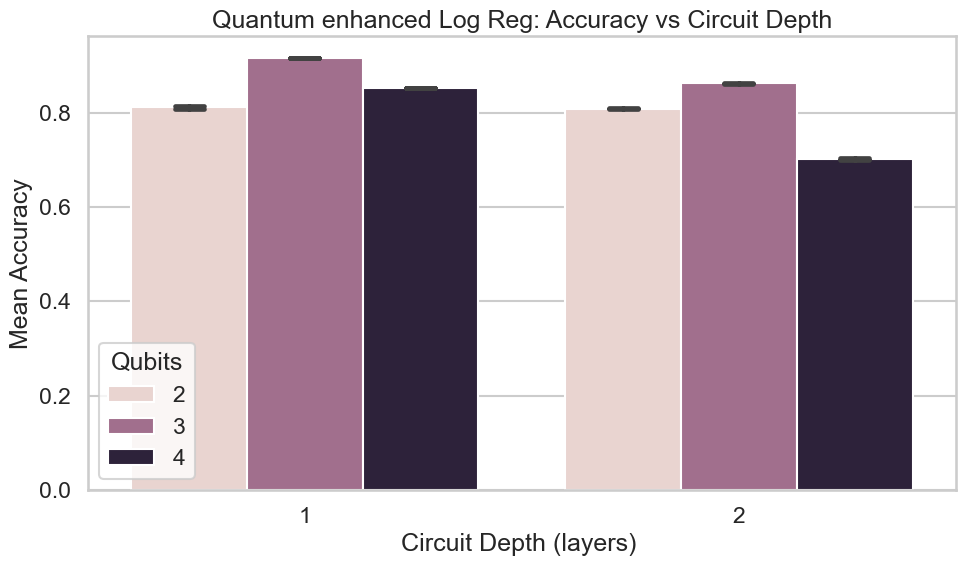

In [22]:
plt.figure()
sns.barplot(   
    data=q_lr_agg, 
    x="depth", y="acc_mean", hue="n_qubits",
    errorbar="sd", 
    capsize=0.2  
)   

plt.title("Quantum enhanced Log Reg: Accuracy vs Circuit Depth")  
plt.ylabel("Mean Accuracy")
plt.xlabel("Circuit Depth (layers) ")  
plt.legend(title="Qubits")  
plt.tight_layout()
plt.show(); 

In [23]:
best_q_lr = q_lr_agg.sort_values("acc_mean", ascending=False).head(5)
display(best_q_lr)

,n_qubits,depth,shots,noise,acc_mean,runtime_sec,improvement_over_classical
5,3,1,1024,False,0.915839,0.030111,-0.080378
4,3,1,0,False,0.915366,0.041991,-0.080851
7,3,2,1024,False,0.862884,0.052727,-0.133333
6,3,2,0,False,0.861466,0.044576,-0.134752
8,4,1,0,False,0.852482,0.056384,-0.143735


**Accuracy vs Shots**

In [33]:
# print(q_lr_agg.head())
# print(q_lr_agg.groupby(['n_qubits', 'depth'])['shots'].count())

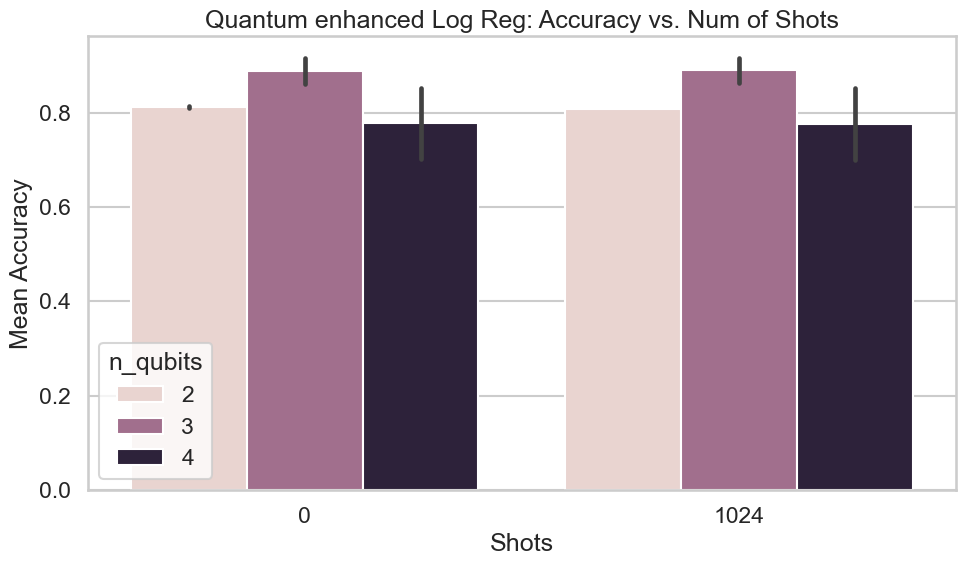

In [25]:
plt.figure()  
sns.barplot(
    data=q_lr_agg, 
    x="shots", y="acc_mean", hue="n_qubits"
)   


plt.title("Quantum enhanced Log Reg: Accuracy vs. Num of Shots")  
plt.ylabel("Mean Accuracy") 
plt.xlabel("Shots")         
# plt.xscale("log")
plt.tight_layout()  
plt.show()   

**Runtime vs Qubits**

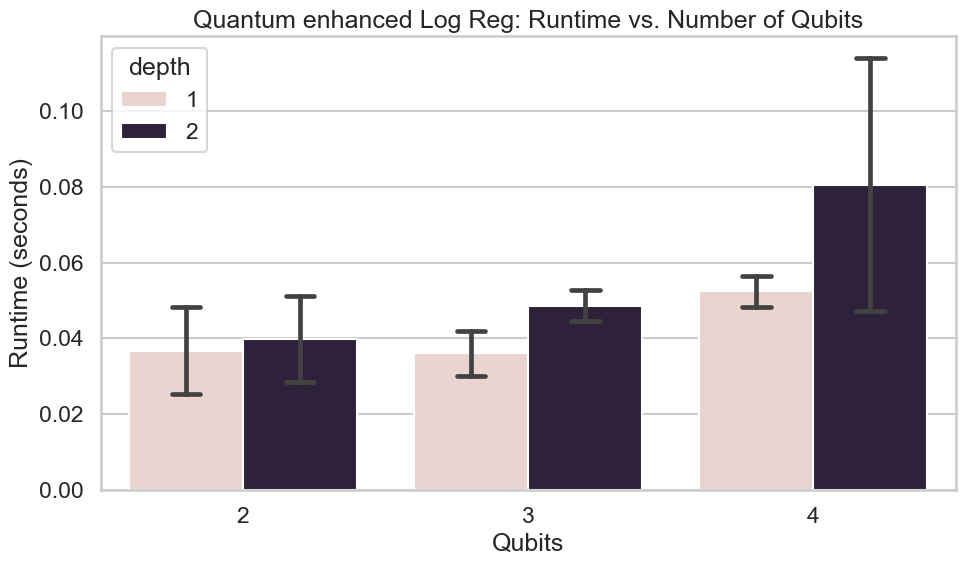

In [26]:
plt.figure()
sns.barplot(
    data=q_lr_agg, 
    x="n_qubits", y="runtime_sec", hue="depth",
    capsize=0.2 
)   


plt.title("Quantum enhanced Log Reg: Runtime vs. Number of Qubits")
plt.ylabel("Runtime (seconds)")
plt.xlabel("Qubits")  
plt.tight_layout()
plt.show();   

**Improvement over classical**

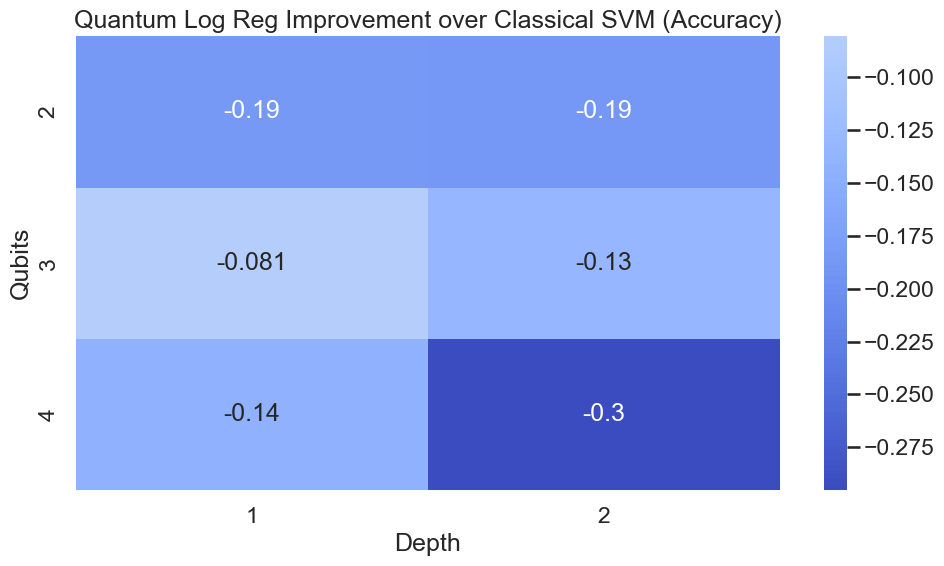

In [27]:
plt.figure()
sns.heatmap(
    q_lr_agg.pivot_table(index="n_qubits", columns="depth", values="improvement_over_classical"),
    annot=True, cmap="coolwarm", center= 0  
)  

plt.title("Quantum Log Reg Improvement over Classical SVM (Accuracy)")
plt.ylabel("Qubits")
plt.xlabel("Depth")
plt.tight_layout()  
plt.show(); 

#### SVM

**Accuracy vs Circuit Depth**

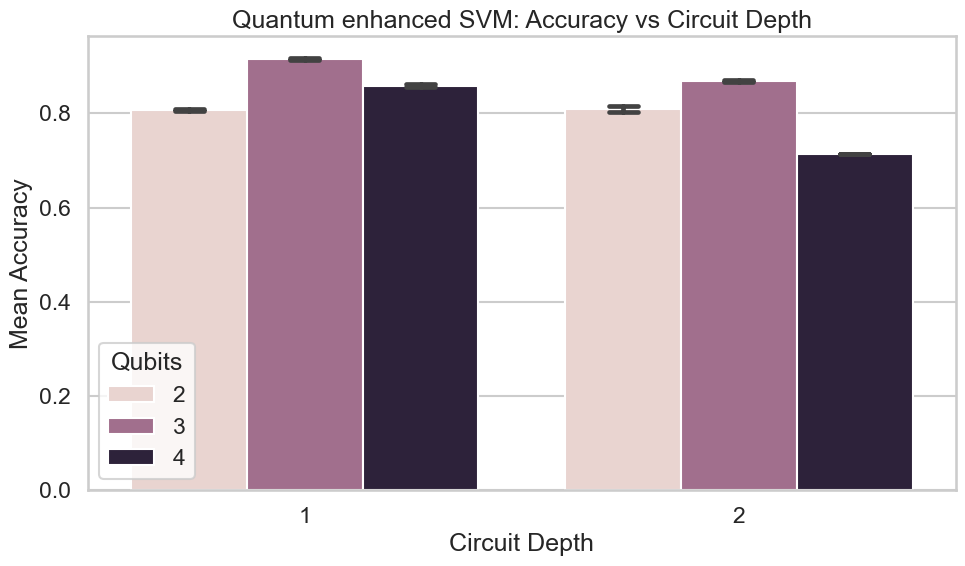

In [28]:
plt.figure()
sns.barplot(   
    data=q_svm_agg, 
    x="depth", y="acc_mean", hue="n_qubits",
    errorbar="sd", 
    capsize=0.2    
)   

plt.title("Quantum enhanced SVM: Accuracy vs Circuit Depth")  
plt.ylabel("Mean Accuracy")
plt.xlabel("Circuit Depth")  
plt.legend(title="Qubits")     
plt.tight_layout()
plt.show(); 

**Accuracy vs Shots**

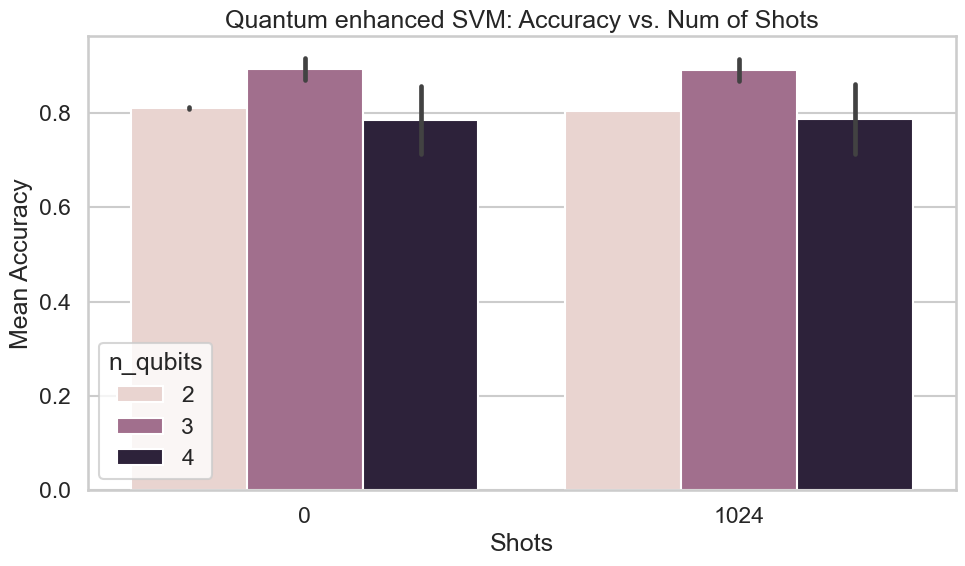

In [29]:
q_svm_agg["shots"] = q_svm_agg["shots"].astype(str)   

plt.figure()  
sns.barplot(
    data=q_svm_agg, 
    x="shots", y="acc_mean", hue="n_qubits"
)  


plt.title("Quantum enhanced SVM: Accuracy vs. Num of Shots")  
plt.ylabel("Mean Accuracy") 
plt.xlabel("Shots")         
# plt.xscale("log")
plt.tight_layout()  
plt.show()   


**Runtime vs Qubits**

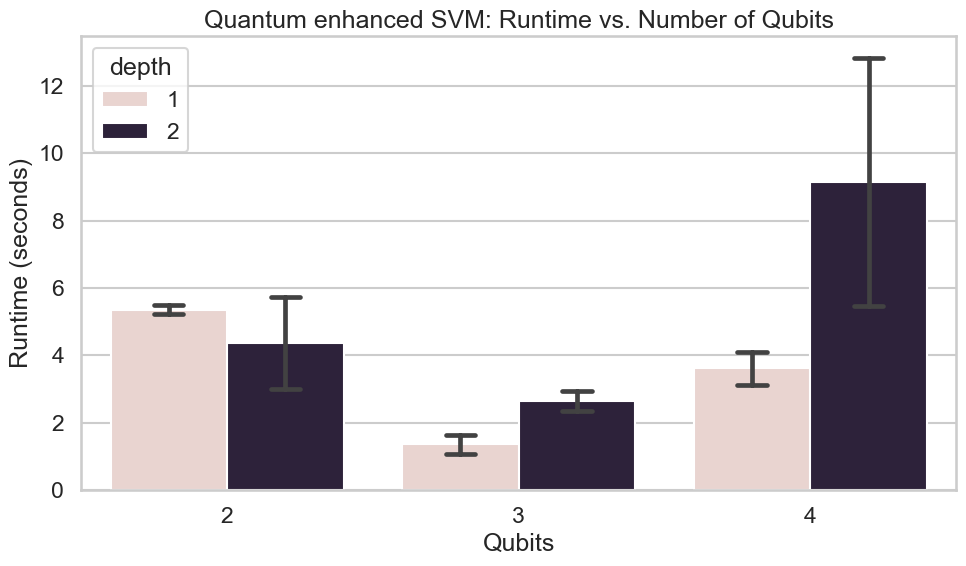

In [30]:
plt.figure()
sns.barplot(
    data=q_svm_agg, 
    x="n_qubits", y="runtime_sec", hue="depth",
    capsize=0.2 
)   


plt.title("Quantum enhanced SVM: Runtime vs. Number of Qubits")
plt.ylabel("Runtime (seconds)")
plt.xlabel("Qubits")  
plt.tight_layout()
plt.show();   

**Improvement over classical**

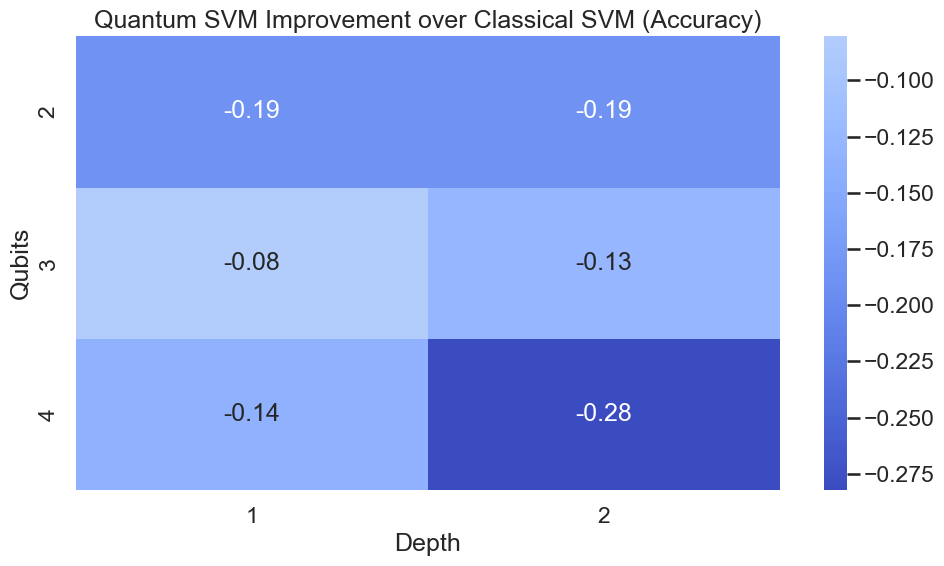

In [31]:
plt.figure()
sns.heatmap(
    q_svm_agg.pivot_table(index="n_qubits", columns="depth", values="improvement_over_classical"),
    annot=True, cmap="coolwarm", center= 0  
)  

plt.title("Quantum SVM Improvement over Classical SVM (Accuracy)")
plt.ylabel("Qubits")
plt.xlabel("Depth")
plt.tight_layout() 
plt.show(); 

### Save Summary

In [32]:
summary_path = "../results/metrics/quantum_summary.csv"
q_lr_agg.to_csv("../results/metrics/final/q_lr_summary.csv", index=False)
q_svm_agg.to_csv("../results/metrics/final/q_svm_summary.csv", index=False)